In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from math import sqrt
from arch import arch_model

In [2]:
data = pd.read_csv("D:\\học đại học\\20222\\machine learning\\saved_data.csv")

In [3]:
data.Date=pd.to_datetime(data["Date"],dayfirst=True)
data.set_index("Date",inplace=True)

data=data.drop(data.columns[[i for i in range(1,23)]],axis=1)

C:\Users\long0\AppData\Local\Temp\ipykernel_19084\2813611728.py:1: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  data.Date=pd.to_datetime(data["Date"],dayfirst=True)


In [4]:
size=int(len(data)*0.8)
train,test=data.iloc[:size],data.iloc[size:]

In [5]:
train["return"]=train["BTC_close"].pct_change(1)*100

C:\Users\long0\AppData\Local\Temp\ipykernel_19084\59943888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["return"]=train["BTC_close"].pct_change(1)*100


In [6]:
test["return"]=test["BTC_close"].pct_change(1)*100

C:\Users\long0\AppData\Local\Temp\ipykernel_19084\1724966016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["return"]=test["BTC_close"].pct_change(1)*100


In [7]:
train['sq_returns'] = train["return"].mul(train["return"])

C:\Users\long0\AppData\Local\Temp\ipykernel_19084\1934355682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['sq_returns'] = train["return"].mul(train["return"])


In [8]:
test['sq_returns'] = test["return"].mul(test["return"])

C:\Users\long0\AppData\Local\Temp\ipykernel_19084\1225261079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['sq_returns'] = test["return"].mul(test["return"])


In [9]:
train

,BTC_close,return,sq_returns
Date,,,
2010-07-20,0.1,NaN,NaN
2010-07-21,0.1,0.000000,0.000000
2010-07-22,0.1,0.000000,0.000000
2010-07-23,0.1,0.000000,0.000000
2010-07-24,0.1,0.000000,0.000000
...,...,...,...
2020-09-23,10237.3,-2.793524,7.803777
2020-09-24,10739.4,4.904614,24.055234
2020-09-25,10688.8,-0.471162,0.221994


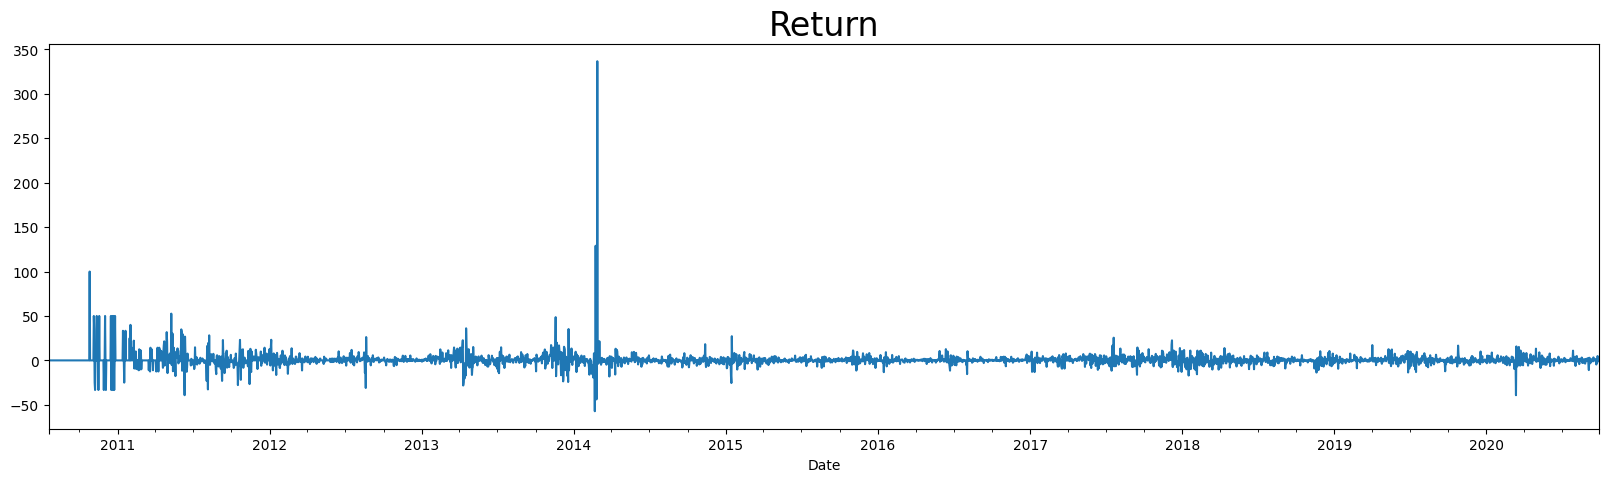

In [10]:
train["return"].plot(figsize=(20,5))
plt.title("Return",size=24)
plt.show()

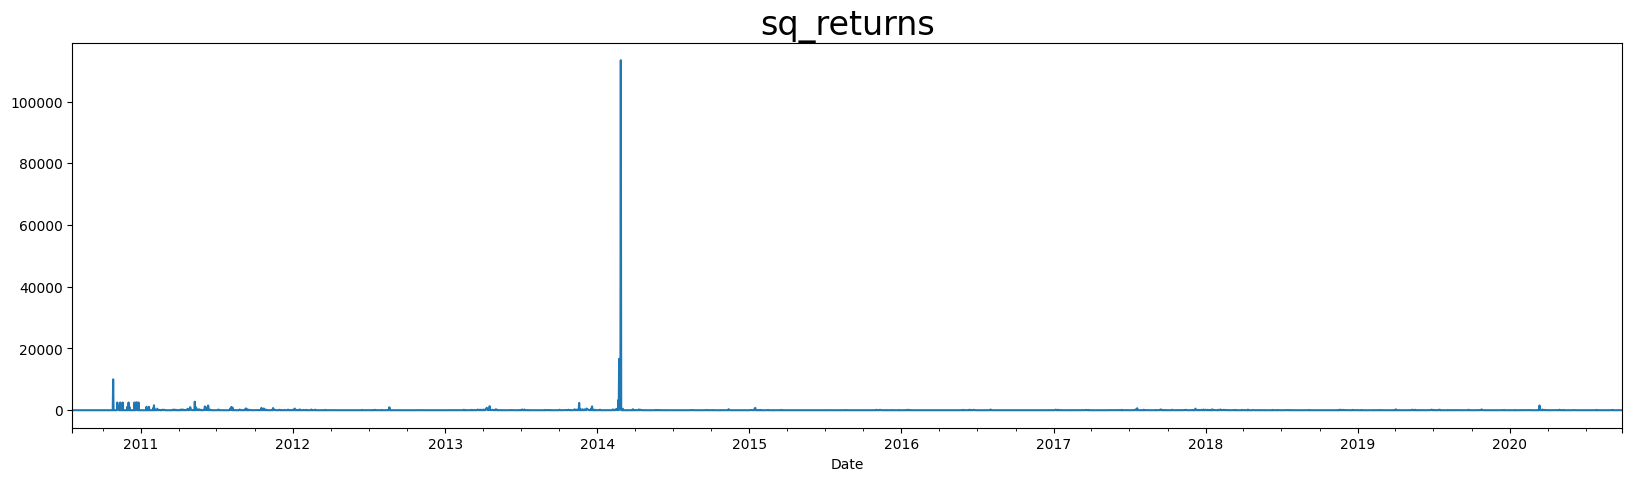

In [11]:
train["sq_returns"].plot(figsize=(20,5))
plt.title("sq_returns",size=24)
plt.show()

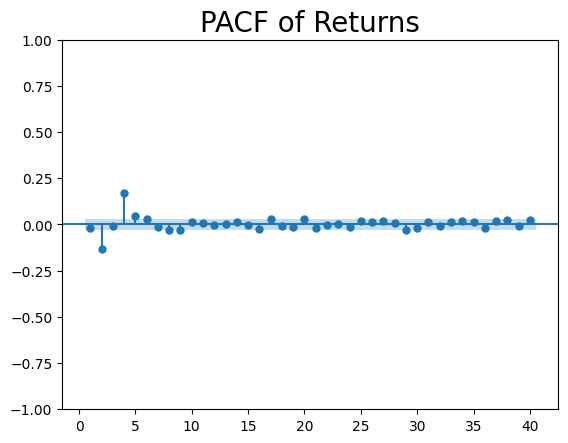

In [12]:
sgt.plot_pacf(train["return"][1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Returns", size = 20)
plt.show()

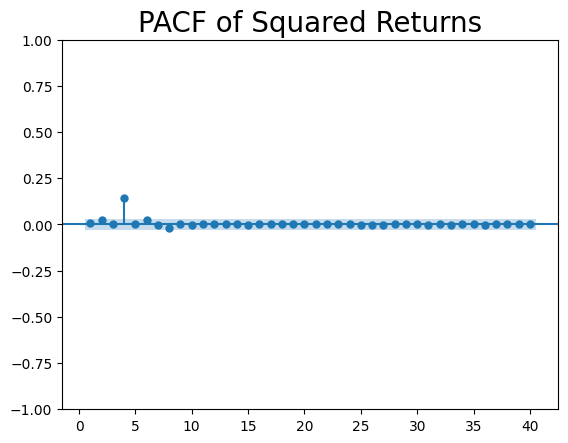

In [13]:
sgt.plot_pacf(train["sq_returns"][1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Squared Returns", size = 20)
plt.show()

In [19]:
model =arch_model(train["return"][1:])
result=model.fit(update_freq=5)
result.summary()

Iteration:      5,   Func. Count:     35,   Neg. LLF: 11407.693007955631
Iteration:     10,   Func. Count:     63,   Neg. LLF: 11334.382251781954
Optimization terminated successfully    (Exit mode 0)
            Current function value: 11334.382251781954
            Iterations: 11
            Function evaluations: 67
            Gradient evaluations: 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -11334.4
Distribution:                  Normal   AIC:                           22676.8
Method:            Maximum Likelihood   BIC:                           22701.7
                                        No. Observations:                 3722
Date:                Mon, Jun 19 2023   Df Residuals:                     3721
Time:                        21:43:38   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.3785  9.425e-02      4.016  5.928e-05 [  0.194,  0.563]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          2.3651      1.438      1.645      0.100   [ -0.454,  5.184]
alpha[1]       0.1429  3.325e-02      4.298  1.721e-05 [7.775e-02,  0.208]
beta[1]        0.8025  3.631e-02     22.103 2.985e-108   [  0.731,  0.874]
==========================================================================

Covariance estimator: robust
"""

In [76]:
prediction=result.forecast(horizon=931).variance.values[-1,:]

c:\Users\long0\AppData\Local\Programs\Python\Python310\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


In [78]:
prediction=pd.Series(prediction,index=test.index)

In [79]:
test['return']

Date
2020-09-28         NaN
2020-09-29    1.381252
2020-09-30   -0.597736
2020-10-01   -1.443936
2020-10-02   -0.453839
                ...   
2023-04-12   -1.069859
2023-04-13    1.676348
2023-04-14    0.280050
2023-04-15   -0.567397
2023-04-16    0.035314
Name: return, Length: 931, dtype: float64

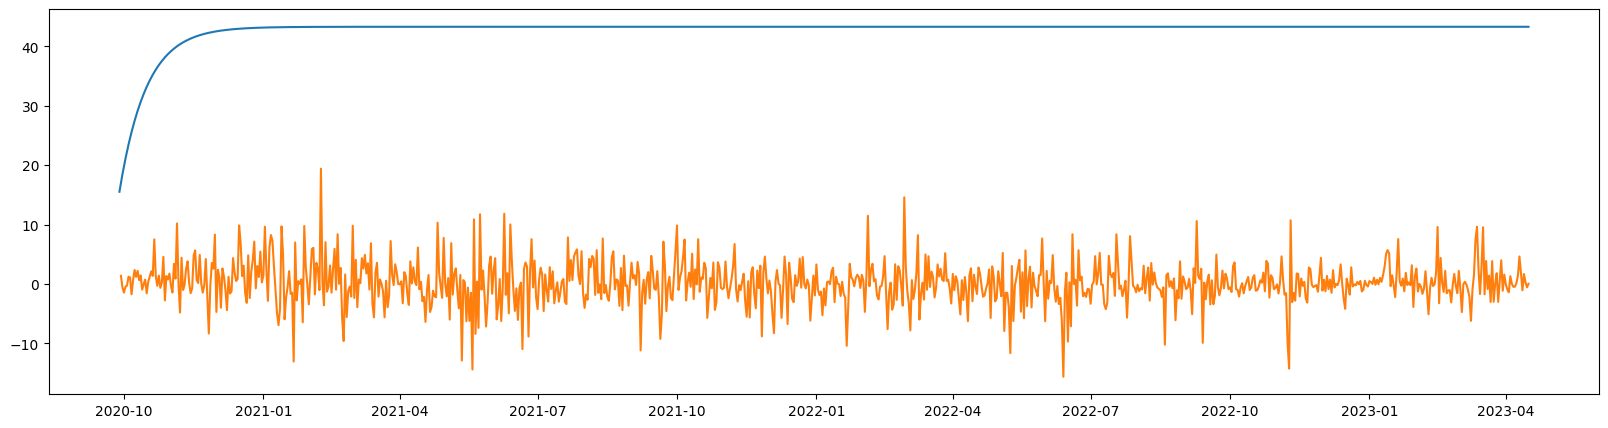

In [81]:
plt.figure(figsize=(20,5))
plt.plot(prediction,label='prediction')
plt.plot(test['return'],label='true')
plt.show()